<a href="https://colab.research.google.com/github/anelk4/SRO_Abdrakhmanova_Anel/blob/main/The_mother_of_Dragons_%D0%9E%D0%BD%D0%B5%D0%BB%D1%8C_%D1%85%D0%B0%D0%BD%D1%8B%D0%BC_DRAGON_AAAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# путь к папкам с датасетом
base_dir = '/content/drive/MyDrive/Colab Notebooks/SRO'

# Инициализируем ImageDataGenerator для автоматической предобработки изображений
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Создаем генераторы данных для обучения и тестирования
train_generator = train_datagen.flow_from_directory(
    base_dir + '/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    base_dir + '/test',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer=SGD(lr=0.002, momentum=0.8),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.compile(optimizer=SGD(learning_rate=0.002, momentum=0.8),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)


Epoch 1/10
80/80 [==============================] - 255s 3s/step - loss: 0.6210 - accuracy: 0.6424 - val_loss: 0.6084 - val_accuracy: 0.6066
Epoch 2/10
80/80 [==============================] - 49s 613ms/step - loss: 0.4523 - accuracy: 0.8030 - val_loss: 0.4432 - val_accuracy: 0.8071
Epoch 3/10
80/80 [==============================] - 48s 597ms/step - loss: 0.3906 - accuracy: 0.8300 - val_loss: 0.3586 - val_accuracy: 0.8553
Epoch 4/10
80/80 [==============================] - 49s 611ms/step - loss: 0.3373 - accuracy: 0.8620 - val_loss: 0.3420 - val_accuracy: 0.8528
Epoch 5/10
80/80 [==============================] - 49s 608ms/step - loss: 0.3037 - accuracy: 0.8745 - val_loss: 0.3186 - val_accuracy: 0.8629
Epoch 6/10
80/80 [==============================] - 48s 599ms/step - loss: 0.2759 - accuracy: 0.8921 - val_loss: 0.4025 - val_accuracy: 0.8173
Epoch 7/10
80/80 [==============================] - 54s 675ms/step - loss: 0.2457 - accuracy: 0.9053 - val_loss: 0.3293 - val_accuracy: 0.8426
E

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


20/20 [==============================] - 5s 231ms/step - loss: 0.2768 - accuracy: 0.8807
Test accuracy: 0.8807106614112854


Saving 0b4064f6-36f0-4e35-a780-02e01fa426f6.jpg to 0b4064f6-36f0-4e35-a780-02e01fa426f6.jpg
1/1 [==============================] - 0s 31ms/step


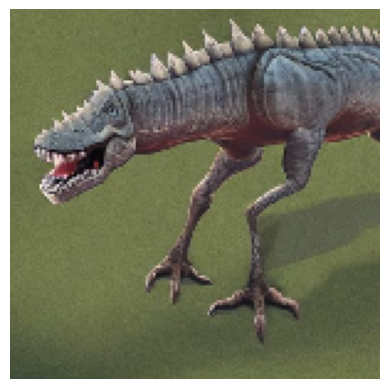

Модель предсказывает: динозавр с вероятностью 96.54%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Функция для загрузки изображения и его предобработки
def load_and_preprocess_image():
    uploaded = files.upload()  # Интерактивная загрузка файла
    if not uploaded:
        return None

    filename = next(iter(uploaded))
    img_path = BytesIO(uploaded[filename])
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)  # Преобразование в массив
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Добавление размерности batch
    img_tensor /= 255.0  # Нормализация

    return img_tensor, filename

# Функция для отображения изображения и предсказания модели
def show_prediction():
    img_tensor, filename = load_and_preprocess_image()
    if img_tensor is None:
        print("Изображение не было загружено.")
        return

    prediction = model.predict(img_tensor)

    # Отображаем изображение
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

    # Выводим предсказание
    if prediction[0] < 0.5:
        print(f"Модель предсказывает: динозавр с вероятностью {100 - prediction[0][0]*100:.2f}%")
    else:
        print(f"Модель предсказывает: дракон с вероятностью {prediction[0][0]*100:.2f}%")

# Запуск функции отображения и предсказания
show_prediction()


Saving 1ccb87ad-13b8-455e-9070-80d5d3574859.jpg to 1ccb87ad-13b8-455e-9070-80d5d3574859.jpg
1/1 [==============================] - 0s 34ms/step


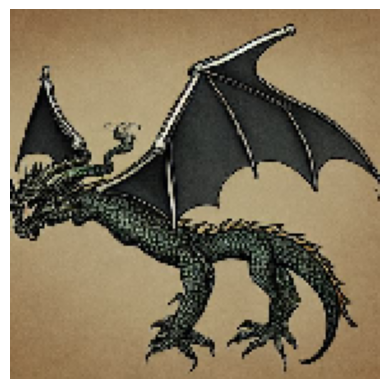

Модель предсказывает: дракон с вероятностью 94.47%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Функция для загрузки изображения и его предобработки
def load_and_preprocess_image():
    uploaded = files.upload()  # Интерактивная загрузка файла
    if not uploaded:
        return None

    filename = next(iter(uploaded))
    img_path = BytesIO(uploaded[filename])
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)  # Преобразование в массив
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Добавление размерности batch
    img_tensor /= 255.0  # Нормализация

    return img_tensor, filename

# Функция для отображения изображения и предсказания модели
def show_prediction():
    img_tensor, filename = load_and_preprocess_image()
    if img_tensor is None:
        print("Изображение не было загружено.")
        return

    prediction = model.predict(img_tensor)

    # Отображаем изображение
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

    # Выводим предсказание
    if prediction[0] < 0.5:
        print(f"Модель предсказывает: динозавр с вероятностью {100 - prediction[0][0]*100:.2f}%")
    else:
        print(f"Модель предсказывает: дракон с вероятностью {prediction[0][0]*100:.2f}%")

# Запуск функции отображения и предсказания
show_prediction()


Saving ДРАКОН.jpg to ДРАКОН.jpg
1/1 [==============================] - 0s 44ms/step


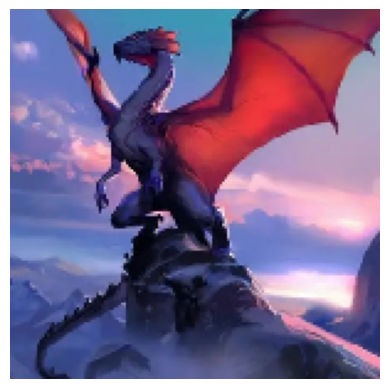

Модель предсказывает: дракон с вероятностью 79.83%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Функция для загрузки изображения и его предобработки
def load_and_preprocess_image():
    uploaded = files.upload()  # Интерактивная загрузка файла
    if not uploaded:
        return None

    filename = next(iter(uploaded))
    img_path = BytesIO(uploaded[filename])
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)  # Преобразование в массив
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Добавление размерности batch
    img_tensor /= 255.0  # Нормализация

    return img_tensor, filename

# Функция для отображения изображения и предсказания модели
def show_prediction():
    img_tensor, filename = load_and_preprocess_image()
    if img_tensor is None:
        print("Изображение не было загружено.")
        return

    prediction = model.predict(img_tensor)

    # Отображаем изображение
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

    # Выводим предсказание
    if prediction[0] < 0.5:
        print(f"Модель предсказывает: динозавр с вероятностью {100 - prediction[0][0]*100:.2f}%")
    else:
        print(f"Модель предсказывает: дракон с вероятностью {prediction[0][0]*100:.2f}%")

# Запуск функции отображения и предсказания
show_prediction()


Saving ДИНОЗАВР 2.png to ДИНОЗАВР 2.png
1/1 [==============================] - 0s 32ms/step


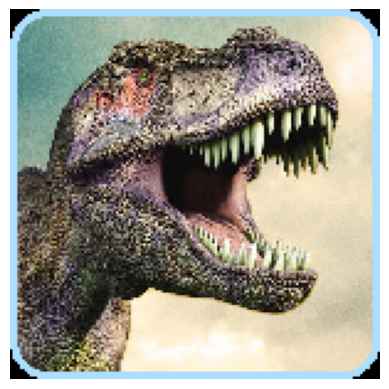

Модель предсказывает: динозавр с вероятностью 81.98%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Функция для загрузки изображения и его предобработки
def load_and_preprocess_image():
    uploaded = files.upload()  # Интерактивная загрузка файла
    if not uploaded:
        return None

    filename = next(iter(uploaded))
    img_path = BytesIO(uploaded[filename])
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)  # Преобразование в массив
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Добавление размерности batch
    img_tensor /= 255.0  # Нормализация

    return img_tensor, filename

# Функция для отображения изображения и предсказания модели
def show_prediction():
    img_tensor, filename = load_and_preprocess_image()
    if img_tensor is None:
        print("Изображение не было загружено.")
        return

    prediction = model.predict(img_tensor)

    # Отображаем изображение
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

    # Выводим предсказание
    if prediction[0] < 0.5:
        print(f"Модель предсказывает: динозавр с вероятностью {100 - prediction[0][0]*100:.2f}%")
    else:
        print(f"Модель предсказывает: дракон с вероятностью {prediction[0][0]*100:.2f}%")

# Запуск функции отображения и предсказания
show_prediction()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Этаааа у нас новый train_generator с аугментацией апаййй))))
train_generator_augmented = train_datagen_augmented.flow_from_directory(
    base_dir + '/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 1594 images belonging to 2 classes.


In [ ]:
# Продолжениеее обучение существующей модели
history_augmented = model.fit(
    train_generator_augmented,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
80/80 [==============================] - 60s 752ms/step - loss: 0.4261 - accuracy: 0.8093 - val_loss: 0.4278 - val_accuracy: 0.8071
Epoch 2/10
80/80 [==============================] - 57s 710ms/step - loss: 0.3831 - accuracy: 0.8250 - val_loss: 0.6100 - val_accuracy: 0.7411
Epoch 3/10
80/80 [==============================] - 56s 702ms/step - loss: 0.3895 - accuracy: 0.8269 - val_loss: 0.6962 - val_accuracy: 0.7132
Epoch 4/10
80/80 [==============================] - 56s 695ms/step - loss: 0.3640 - accuracy: 0.8356 - val_loss: 0.5153 - val_accuracy: 0.7843
Epoch 5/10
80/80 [==============================] - 55s 682ms/step - loss: 0.3532 - accuracy: 0.8476 - val_loss: 0.2867 - val_accuracy: 0.8782
Epoch 6/10
80/80 [==============================] - 56s 702ms/step - loss: 0.3438 - accuracy: 0.8526 - val_loss: 0.3745 - val_accuracy: 0.8452
Epoch 7/10
80/80 [==============================] - 56s 699ms/step - loss: 0.3515 - accuracy: 0.8507 - val_loss: 0.6190 - val_accuracy: 0.7462

In [ ]:
model.save('model_dino_or_dragon.keras')


In [36]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
# объект history_augmented для анализа

print(history_augmented.history['loss'])  # Список потерь на обучающем наборе
print(history_augmented.history['val_loss'])  # Список потерь на тестовом наборе

# Вычисление медианы и стандартного отклонения потерь:
import numpy as np
median_loss = np.median(history_augmented.history['loss'])
std_loss = np.std(history_augmented.history['loss'])
print(f"Медиана потерь: {median_loss}")
print(f"Стандартное отклонение потерь: {std_loss}")


model.save('model_dino_or_dragon.keras')


[0.4260910153388977, 0.38306939601898193, 0.389506071805954, 0.36396053433418274, 0.35316652059555054, 0.3438388705253601, 0.3514977991580963, 0.3464759886264801, 0.3209340572357178, 0.33508139848709106]
[0.4277671277523041, 0.609991729259491, 0.6961988806724548, 0.5153108239173889, 0.28674396872520447, 0.3745208978652954, 0.6189819574356079, 0.3511568307876587, 0.48156169056892395, 0.4780441224575043]
Медиана потерь: 0.3523321598768234
Стандартное отклонение потерь: 0.029117190697331968


In [37]:
# Список точности обучения на всех эпохах
train_accuracy = [0.8093, 0.8250, 0.8269, 0.8356, 0.8476, 0.8526, 0.8507, 0.8450, 0.8745, 0.8576]

# Вычисление медианы
median_train_accuracy = np.median(train_accuracy)

print(f"Медиана точности обучения: {median_train_accuracy}")


Медиана точности обучения: 0.8463


Saving Динозавр 3.jpg to Динозавр 3 (1).jpg
1/1 [==============================] - 0s 80ms/step


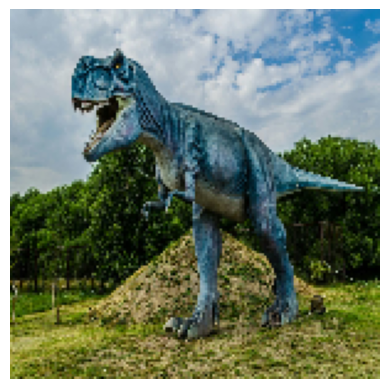

Модель предсказывает: динозавр с вероятностью 99.95%


In [ ]:
from tensorflow.keras.models import load_model

# Загрузка модели
model = load_model('model_dino_or_dragon.keras')

# Функция для загрузки и предобработки изображения
def load_and_preprocess_image():
    uploaded = files.upload()  # Интерактивная загрузка файла
    if not uploaded:
        print("No file was uploaded.")
        return None, None

    filename = next(iter(uploaded))
    img_path = BytesIO(uploaded[filename])
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0

    return img_tensor, filename

# Функция для отображения изображения и предсказания модели
def show_prediction():
    img_tensor, filename = load_and_preprocess_image()
    if img_tensor is None:
        print("Изображение не было загружено.")
        return

    prediction = model.predict(img_tensor)

    # Отображение изображения
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

    # Вывод предсказания
    if prediction[0] < 0.5:
        print(f"Модель предсказывает: динозавр с вероятностью {100 - prediction[0][0]*100:.2f}%")
    else:
        print(f"Модель предсказывает: дракон с вероятностью {prediction[0][0]*100:.2f}%")

# Вызов функции для отображения изображения и предсказания
show_prediction()


Saving ДРАКОН.jpg to ДРАКОН (2).jpg
1/1 [==============================] - 0s 83ms/step


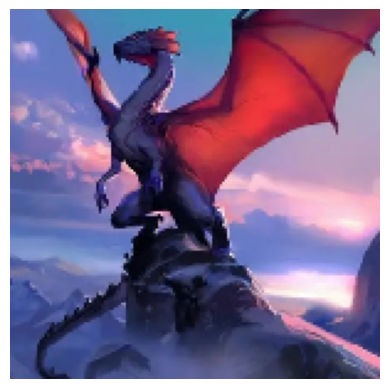

Модель предсказывает: дракон с вероятностью 81.95%


In [ ]:
from tensorflow.keras.models import load_model

# Загрузка модели
model = load_model('model_dino_or_dragon.keras')

# Функция для загрузки и предобработки изображения
def load_and_preprocess_image():
    uploaded = files.upload()  # Интерактивная загрузка файла
    if not uploaded:
        print("No file was uploaded.")
        return None, None

    filename = next(iter(uploaded))
    img_path = BytesIO(uploaded[filename])
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0

    return img_tensor, filename

# Функция для отображения изображения и предсказания модели
def show_prediction():
    img_tensor, filename = load_and_preprocess_image()
    if img_tensor is None:
        print("Изображение не было загружено.")
        return

    prediction = model.predict(img_tensor)

    # Отображение изображения
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

    # Вывод предсказания
    if prediction[0] < 0.5:
        print(f"Модель предсказывает: динозавр с вероятностью {100 - prediction[0][0]*100:.2f}%")
    else:
        print(f"Модель предсказывает: дракон с вероятностью {prediction[0][0]*100:.2f}%")

# Вызов функции для отображения изображения и предсказания
show_prediction()


Saving 0e9167b2-132c-478b-939a-5408cd085ec8.jpg to 0e9167b2-132c-478b-939a-5408cd085ec8.jpg
1/1 [==============================] - 0s 84ms/step


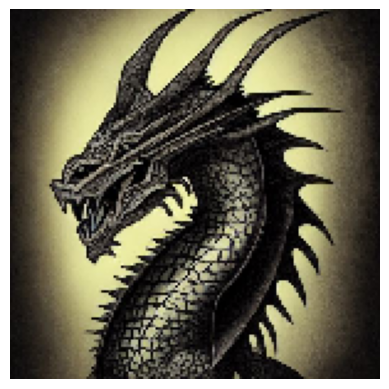

Модель предсказывает: дракон с вероятностью 99.85%


In [ ]:
from tensorflow.keras.models import load_model

# Загрузка модели
model = load_model('model_dino_or_dragon.keras')

# Функция для загрузки и предобработки изображения
def load_and_preprocess_image():
    uploaded = files.upload()  # Интерактивная загрузка файла
    if not uploaded:
        print("No file was uploaded.")
        return None, None

    filename = next(iter(uploaded))
    img_path = BytesIO(uploaded[filename])
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0

    return img_tensor, filename

# Функция для отображения изображения и предсказания модели
def show_prediction():
    img_tensor, filename = load_and_preprocess_image()
    if img_tensor is None:
        print("Изображение не было загружено.")
        return

    prediction = model.predict(img_tensor)

    # Отображение изображения
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

    # Вывод предсказания
    if prediction[0] < 0.5:
        print(f"Модель предсказывает: динозавр с вероятностью {100 - prediction[0][0]*100:.2f}%")
    else:
        print(f"Модель предсказывает: дракон с вероятностью {prediction[0][0]*100:.2f}%")

# Вызов функции для отображения изображения и предсказания
show_prediction()


Saving 0b4064f6-36f0-4e35-a780-02e01fa426f6.jpg to 0b4064f6-36f0-4e35-a780-02e01fa426f6 (1).jpg
1/1 [==============================] - 0s 97ms/step


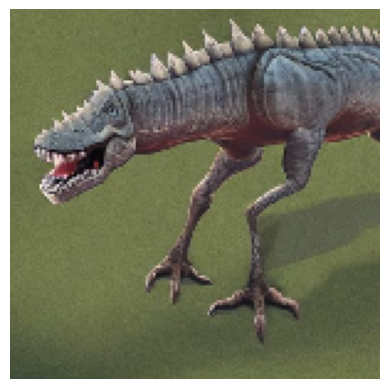

Модель предсказывает: динозавр с вероятностью 75.74%


In [ ]:
from tensorflow.keras.models import load_model

# Загрузка модели
model = load_model('model_dino_or_dragon.keras')

# Функция для загрузки и предобработки изображения
def load_and_preprocess_image():
    uploaded = files.upload()  # Интерактивная загрузка файла
    if not uploaded:
        print("No file was uploaded.")
        return None, None

    filename = next(iter(uploaded))
    img_path = BytesIO(uploaded[filename])
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0

    return img_tensor, filename

# Функция для отображения изображения и предсказания модели
def show_prediction():
    img_tensor, filename = load_and_preprocess_image()
    if img_tensor is None:
        print("Изображение не было загружено.")
        return

    prediction = model.predict(img_tensor)

    # Отображение изображения
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

    # Вывод предсказания
    if prediction[0] < 0.5:
        print(f"Модель предсказывает: динозавр с вероятностью {100 - prediction[0][0]*100:.2f}%")
    else:
        print(f"Модель предсказывает: дракон с вероятностью {prediction[0][0]*100:.2f}%")

# Вызов функции для отображения изображения и предсказания
show_prediction()
